<a href="https://colab.research.google.com/github/annvorosh/GB/blob/main/MLB_L07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание

1. Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. Сделать обзорный анализ выбранного датасета
3. Обучить любой классификатор (какой вам нравится)
4.  разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для 5 случайных объектов из тестового набора

In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.3 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


О Наборе Данных "Рак молочной железы Висконсин (диагностика)"

Особенности вычисляются из оцифрованного изображения тонкого игольчатого аспирата (FNA) массы груди. Они описывают характеристики ядер клеток, присутствующих на изображении. n 3-мерное пространство - это то, что описано в: [K. П. Беннетт и О. Л. Мангасарян: "Проверная дискриминация линейного программирования двух линейно неразрывных чисел", методы оптимизации и программное обеспечение 1, 1992, 23-34].


Также можно найти в репозитории машинного обучения UCI: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [39]:
# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
                'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
                'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se',
                'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst',
                'Perimeter_worst', 'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst',
                'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst']
df = pd.read_csv(url, names=column_names)
df.head()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   Perimeter_mean           569 non-null    float64
 5   Area_mean                569 non-null    float64
 6   Smoothness_mean          569 non-null    float64
 7   Compactness_mean         569 non-null    float64
 8   Concavity_mean           569 non-null    float64
 9   Concave_points_mean      569 non-null    float64
 10  Symmetry_mean            569 non-null    float64
 11  Fractal_dimension_mean   569 non-null    float64
 12  Radius_se                569 non-null    float64
 13  Texture_se               569 non-null    float64
 14  Perimeter_se             5

In [41]:
# Извлечение признаков и целевой переменной
features = df.drop(['ID', 'Diagnosis'], axis=1)
target = df['Diagnosis']

In [42]:
target.unique()

array(['M', 'B'], dtype=object)

In [43]:
# Преобразование целевой переменной в бинарные переменные
target = target.map({'M': 1, 'B': 0})

- 'M': соответствует злокачественным массам (malignant)
- 'B': соответствует доброкачественным массам (benign)

In [44]:
target.unique()

array([1, 0])

In [45]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [46]:
# Feature Engineering (если необходимо)
# Можно применить методы масштабирования, отбора признаков, создания новых признаков и т. д.

# соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]


continuous_columns = ['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
                'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
                'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se',
                'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst',
                'Perimeter_worst', 'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst',
                'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst']
final_transformers = list()

for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))

feats = FeatureUnion(final_transformers)

In [47]:
regressor = Pipeline([
    ('features', feats),
    ('regressor', LinearRegression()),
])

In [48]:
# обучим наш пайплайн
regressor.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Radius_mean',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Radius_mean')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Texture_mean',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Texture_mean')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Perimeter_mean',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Perim...
                                                                  NumberSelector(key='Concave_points_worst')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Symmetry_worst',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Symmetry_worst')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Fractal_dimension_worst',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Fractal_dimension_worst')),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('regressor', LinearRegression())])

In [49]:
predictions = regressor.predict(X_test)

mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.1969037446564639, 0.7271016126223554)

In [51]:
features = pd.DataFrame(regressor[1].coef_,
                        continuous_columns,
                        columns=['coefficient'])

features.sort_values('coefficient', ascending=False)

,coefficient
Radius_worst,1.030589
Perimeter_mean,0.553346
Concave_points_mean,0.186887
Concavity_worst,0.128794
Radius_se,0.122265
Compactness_worst,0.118095
Area_mean,0.116514
Concave_points_se,0.114169
Concavity_mean,0.079846
Symmetry_worst,0.064415


#### Как это можно интерпретировать:
- Radius_worst имеет наибольшую важность и положителен (чем выше "худшее" или наибольшее среднее значение для среднего расстояния от центра до точек по периметру, тем выше вероятность злокачественности опухоли)

- вторым по важности признаком является средний периметр опухоли (Perimeter_mean)

### Перейдем к "деревянным" моделям

In [52]:
import xgboost as xgb

regressor = Pipeline([
    ('features', feats),
    ('regressor', xgb.XGBRegressor()),
])

# обучим наш пайплайн
regressor.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Radius_mean',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Radius_mean')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Texture_mean',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Texture_mean')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Perimeter_mean',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Perim...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [53]:
predictions = regressor.predict(X_test)

mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.06792603075416737, 0.8116708263149287)

In [54]:
xgb_features = pd.DataFrame(regressor[1].feature_importances_,
                            continuous_columns,
                            columns=['coefficient'])

xgb_features.sort_values('coefficient', ascending=False)

,coefficient
Concave_points_mean,0.582572
Concave_points_worst,0.121471
Radius_worst,0.091111
Area_worst,0.050377
Perimeter_worst,0.046582
Concavity_se,0.020129
Texture_mean,0.013260
Texture_worst,0.009945
Concave_points_se,0.008579
Concavity_worst,0.008222


- Эта модель показала себя лучше судя по mean_absolute_error и r2_score, но важность признаков тут несколько другай и я на первые места вышли Concave_points_mean и Concave_points_worst.
- Подходы, основанные на feature_importance, очень удобны, т.к по факту мы получаем готовый функционал и можем хоть какую-то интерпретацию давать без каких-либо внешних инструментов.
- Однако проблема такого подхода заключается в том, что непонятно, как именно данная фича влияет на итоговый прогноз.

2. Permutation importance
Алгоритм очень простой:
- обучаем модель на тренировочном наборе данных
- проверяем качество на валидации
- для валидационного набора данных перемешиваем один из признаков
- снова проверяем качество на нем же
- Признак считается «важным», если качество модели падает при его перемешивании.

LGBM

Отрисовка идет по двум классам

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


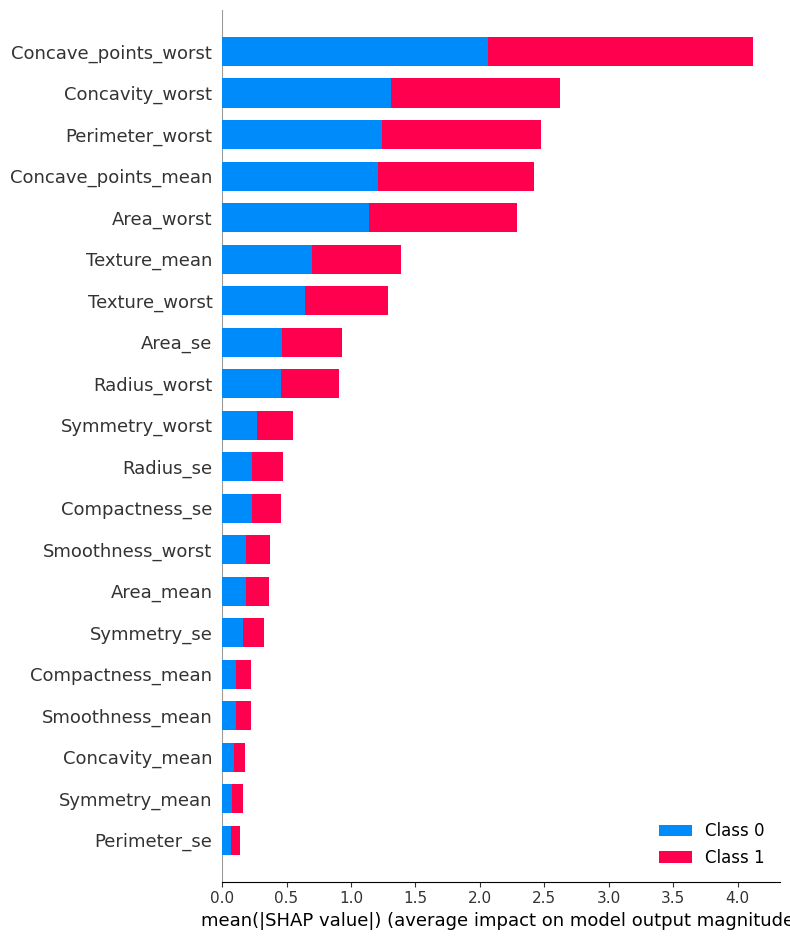

In [55]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=1)
lgb_model.fit(X_train, y_train)

y_preds = lgb_model.predict(X_test)

# строим модель объяснения в SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# покажем объяснение
shap.initjs() # для работы в колабе
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


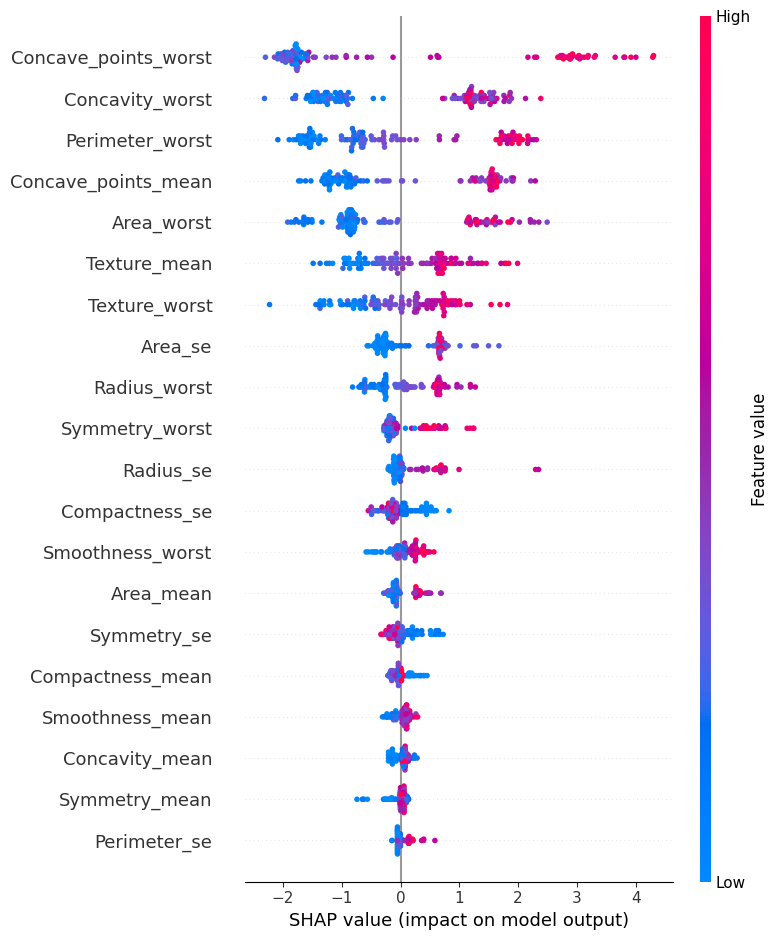

In [62]:
if isinstance(shap_values, list):
    shap_values = shap_values[1]

shap.summary_plot(shap_values, X_test)

С каждым объектом и признаком связывается величина дорокачественности или злокачественности. Она показывает, что данное значение поднимало ответ нашей модели или опускало:
- положительные значения - увеличивался ответ (справа от вертикальной линии, целевой класс)
- отрицательные значения - уменьшался ответ (слева от вертикальной линии, нецелевой класс)

А результирующий график - это
- толщина полосы - как много таких значений
- длина полосы - какой вклад вносится в ответ
- high/low - значения в самом признаке


**Пара интерпретаций:**
1. concave points_worst ("худшее" или наибольшее среднее значение для количества вогнутых частей контура) высокие значения concave points_worst могут быть как злокачественными, так и доброкачественными. При этом низкие значения concave points_worst указывают на доброкачественность.  
2. А вот concavity_worst дает более четкое разделение на злокачественность и доброкачественность пухоли.
3. perimeter_worst так же четко разделяет классы, чем выше значение признака, тем более верочтно, что опухоль злокачественная. А малый периметр говорит о доброкачественности.
4. concave points_mean (количество вогнутых частей контура) и area_mean также четко разделяют значение таргета.

In [59]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=080d41ec49b6be2c24f5b3dddda1ac562ad7d5655da7a9a4b7609109f17935ca
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [64]:
import eli5

model = lgb_model

eli5.show_weights(model, feature_names=X_train.columns.tolist())
# Во-первых, библиотека позволяет анализировать веса модели для оценивания поведения модели.

Weight,Feature
0.3769,Concave_points_mean
0.2541,Concave_points_worst
0.1064,Area_worst
0.0534,Radius_worst
0.0467,Texture_worst
0.0358,Perimeter_worst
0.0284,Texture_mean
0.0263,Concavity_worst
0.0134,Area_se
0.0102,Radius_se


In [66]:
from eli5 import show_prediction

idx = 10
show_prediction(model, X_train.iloc[idx], feature_names=X_train.columns.tolist(),
                show_feature_values=True)
# Во-вторых, она позволяет анализировать вклад признаков и их значений в конкретные объекты.

explain_weights_sklearn() - метод, позволяющий вернуть explainer объект. Мы можем теперь накладывать на него разные форматирования.

In [67]:
from sklearn.tree import DecisionTreeClassifier

n = 100
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train.iloc[:n], y_train[:n])

DecisionTreeClassifier(random_state=1)

In [68]:
from eli5.sklearn import explain_weights_sklearn

explanation = explain_weights_sklearn(tree_model, feature_names=X_train.columns.tolist())
type(explanation)

eli5.base.Explanation

In [69]:
from eli5.formatters import format_as_text

print(format_as_text(explanation))

Explained as: decision tree

Decision tree feature importances; values are numbers 0 <= x <= 1;
all values sum to 1.

0.9102  Area_worst
0.0453  Smoothness_worst
0.0445  Symmetry_mean
     0  Concave_points_worst
     0  Area_mean
     0  Smoothness_mean
     0  Compactness_mean
     0  Concavity_mean
     0  Concave_points_mean
     0  Fractal_dimension_mean
     0  Radius_se
     0  Texture_se
     0  Perimeter_se
     0  Area_se
     0  Texture_mean
     0  Radius_mean
     0  Concavity_se
     0  Compactness_worst
     0  Perimeter_mean
     0  Fractal_dimension_worst
          … 10 more …          

Area_worst <= 842.600  (68.0%)
    Smoothness_worst <= 0.176  (67.0%)  ---> 0.000
    Smoothness_worst > 0.176  (1.0%)  ---> 1.000
Area_worst > 842.600  (32.0%)
    Symmetry_mean <= 0.145  (1.0%)  ---> 0.000
    Symmetry_mean > 0.145  (31.0%)  ---> 1.000


### Интерпретация

Каждый признак имеет значение от 0 до 1, где сумма значений всех признаков равна 1. Большее значение указывает на более важный признак для классификации.

В данном случае, важность признаков представлена следующим образом:

Area_worst: 0.9102
Smoothness_worst: 0.0453
Symmetry_mean: 0.0445
Остальные признаки имеют значение 0 и, следовательно, не оказывают влияния на классификацию согласно данной модели решающего дерева.

Каждая строка после важности признаков представляет условие разделения на две ветви в решающем дереве и проценты экземпляров, которые попадают в каждую ветвь при выполнении данного условия. Например, в данном случае:

Если значение Area_worst <= 842.600, то 68% экземпляров попадают в эту ветвь. Затем, если значение Smoothness_worst <= 0.176, то 67% экземпляров из предыдущей ветви попадают в эту ветвь и классифицируются как 0 (доброкачественные опухоли).
Если значение Area_worst <= 842.600, то 32% экземпляров попадают в эту ветвь. Затем, если значение Symmetry_mean <= 0.145, то 1% экземпляров из предыдущей ветви попадают в эту ветвь и классифицируются как 0 (доброкачественные опухоли). Если значение Symmetry_mean > 0.145, то 31% экземпляров из предыдущей ветви попадают в эту ветвь и классифицируются как 1 (злокачественные опухоли).
Таким образом, решающее дерево на основе данных важностей признаков делает предсказания на основе нескольких ключевых признаков, таких как Area_worst, Smoothness_worst и Symmetry_mean, в зависимости от их значений и условий разделения ветвей дерева.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


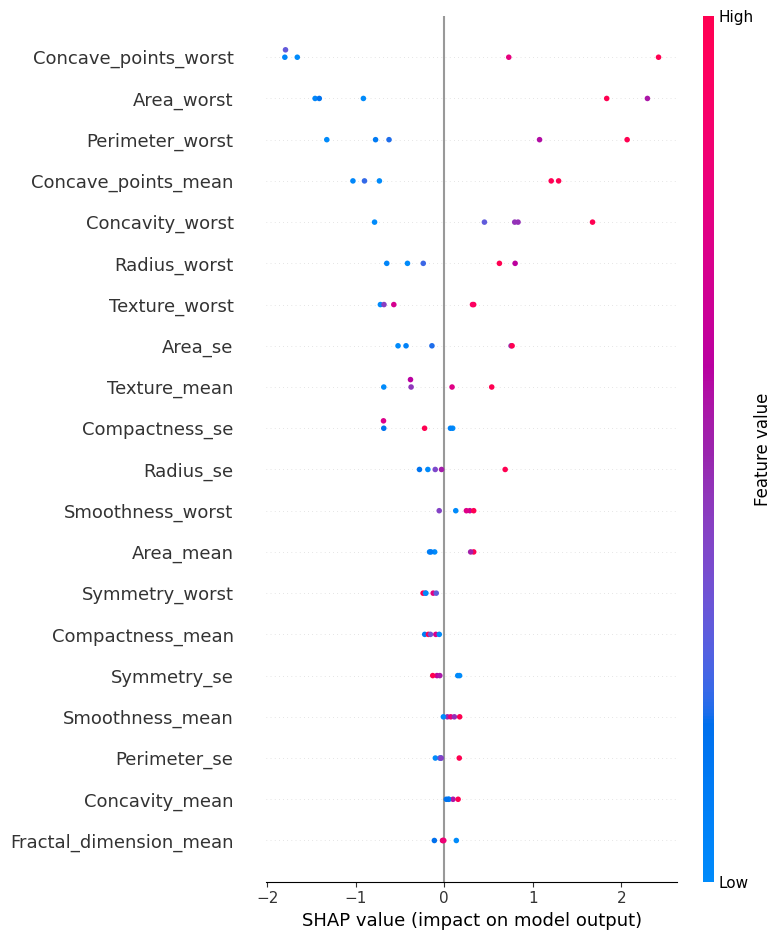

In [72]:
# Создание объекта Explainer с использованием обученной модели и данных
explainer = shap.Explainer(lgb_model, X_train)

# Вычисление значений SHAP для 5 случайных объектов из тестового набора
shap_values = explainer.shap_values(X_test.iloc[:5])

# Построение важностей признаков
shap.summary_plot(shap_values, X_test.iloc[:5])
